In [4]:
import pandas as pd 
from mplsoccer.pitch import Pitch 

In [17]:
df = pd.read_csv('valladolidA.csv')

In [18]:
df.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8


In [19]:
df = df[df['teamId'] == 'Barcelona']

In [20]:
df

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,2248257083,1028,93,55.0,Barcelona,77.1,49.0,2,SavedShot,Successful,10.0,NaN,NaN
1671,2248257093,1029,93,57.0,Barcelona,86.9,49.6,2,CornerAwarded,Successful,10.0,NaN,NaN
1673,2248257153,1030,94,0.0,Barcelona,0.0,0.0,2,End,Successful,NaN,NaN,NaN
1675,2248257147,1031,0,0.0,Barcelona,0.0,0.0,14,End,Successful,NaN,NaN,NaN


In [21]:
df['player_passed'] = df['playerId']
df['recipent'] = df['playerId'].shift(-1) # shift the data to one row above

In [22]:
passes = df[df['type']=='Pass']
successful_passes = passes[passes['outcome']=='Successful']

In [23]:
successful_passes

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,player_passed,recipent
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2248256867,1018,93,14.0,Barcelona,76.7,31.8,2,Pass,Successful,8.0,76.7,43.0,8.0,10.0
1652,2248256869,1019,93,17.0,Barcelona,79.6,24.2,2,Pass,Successful,10.0,77.1,53.6,10.0,14.0
1653,2248256983,1020,93,18.0,Barcelona,77.1,56.4,2,Pass,Successful,14.0,69.0,56.9,14.0,44721.0
1654,2248256989,1021,93,20.0,Barcelona,68.3,55.2,2,Pass,Successful,44721.0,87.0,17.3,44721.0,2.0


In [26]:
subs = df[df['type']=='SubstitutionOff']
subs = subs['minute']

first_sub = subs.min()

In [27]:
first_sub

np.int64(70)

In [28]:
successful_passes = successful_passes[successful_passes['minute']<first_sub]

In [29]:
successful_passes

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,player_passed,recipent
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2248252877,782,69,30.0,Barcelona,83.1,42.8,2,Pass,Successful,9.0,89.9,21.5,9.0,2.0
1231,2248252881,783,69,32.0,Barcelona,90.5,23.0,2,Pass,Successful,2.0,78.6,36.9,2.0,8.0
1234,2248252897,785,69,36.0,Barcelona,84.6,27.7,2,Pass,Successful,8.0,90.3,14.3,8.0,2.0
1235,2248252905,786,69,37.0,Barcelona,90.7,14.3,2,Pass,Successful,2.0,88.4,15.3,2.0,8.0


In [30]:
pass_ = pd.to_numeric(successful_passes['player_passed'], downcast='integer')
recepient_ = pd.to_numeric(successful_passes['recipent'], downcast='integer')

successful_passes['player_passed'] = pass_ 
successful_passes['recipent'] = recepient_

/tmp/ipykernel_16044/4084916515.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_passes['player_passed'] = pass_
/tmp/ipykernel_16044/4084916515.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_passes['recipent'] = recepient_


In [31]:
successful_passes

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,player_passed,recipent
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9,8
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8,21
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21,15
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15,1
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2248252877,782,69,30.0,Barcelona,83.1,42.8,2,Pass,Successful,9.0,89.9,21.5,9,2
1231,2248252881,783,69,32.0,Barcelona,90.5,23.0,2,Pass,Successful,2.0,78.6,36.9,2,8
1234,2248252897,785,69,36.0,Barcelona,84.6,27.7,2,Pass,Successful,8.0,90.3,14.3,8,2
1235,2248252905,786,69,37.0,Barcelona,90.7,14.3,2,Pass,Successful,2.0,88.4,15.3,2,8


In [32]:
# Average Locations

average_locations = successful_passes.groupby('player_passed').agg({'x':['mean'], 'y':['mean', 'count']})
average_locations.columns = ['x', 'y', 'count']
average_locations

,x,y,count
player_passed,,,
1,7.124000,50.324000,25
2,68.274359,11.915385,39
4,32.895833,43.518750,48
8,53.332927,41.608537,82
9,69.916667,51.383333,6
10,63.201613,42.351613,62
15,38.409091,74.378182,55
16,69.594286,69.471429,35
18,55.242553,83.793617,47


In [34]:
pass_between = successful_passes.groupby(['player_passed', 'recipent']).id.count().reset_index()
pass_between.rename({'id':'pass_count'}, axis='columns', inplace=True)

pass_between = pass_between.merge(average_locations, left_on='player_passed', right_index = True)
pass_between = pass_between.merge(average_locations, left_on='recipent', right_index = True, suffixes=['','_end'])


In [35]:
pass_between

,player_passed,recipent,pass_count,x,y,count,x_end,y_end,count_end
0,1,2,3,7.124000,50.324000,25,68.274359,11.915385,39
1,1,4,3,7.124000,50.324000,25,32.895833,43.518750,48
2,1,8,4,7.124000,50.324000,25,53.332927,41.608537,82
3,1,9,1,7.124000,50.324000,25,69.916667,51.383333,6
4,1,15,4,7.124000,50.324000,25,38.409091,74.378182,55
...,...,...,...,...,...,...,...,...,...
85,28,8,13,49.156863,16.282353,51,53.332927,41.608537,82
86,28,9,3,49.156863,16.282353,51,69.916667,51.383333,6
87,28,10,5,49.156863,16.282353,51,63.201613,42.351613,62
88,28,18,1,49.156863,16.282353,51,55.242553,83.793617,47


In [36]:
pass_between = pass_between[pass_between['pass_count']>3]

In [37]:
pass_between

,player_passed,recipent,pass_count,x,y,count,x_end,y_end,count_end
2,1,8,4,7.124000,50.324000,25,53.332927,41.608537,82
4,1,15,4,7.124000,50.324000,25,38.409091,74.378182,55
11,2,8,11,68.274359,11.915385,39,53.332927,41.608537,82
13,2,10,11,68.274359,11.915385,39,63.201613,42.351613,62
15,2,21,5,68.274359,11.915385,39,55.663636,52.263636,55
16,2,28,7,68.274359,11.915385,39,49.156863,16.282353,51
17,4,1,5,32.895833,43.518750,48,7.124000,50.324000,25
19,4,8,6,32.895833,43.518750,48,53.332927,41.608537,82
21,4,15,20,32.895833,43.518750,48,38.409091,74.378182,55
23,4,21,6,32.895833,43.518750,48,55.663636,52.263636,55


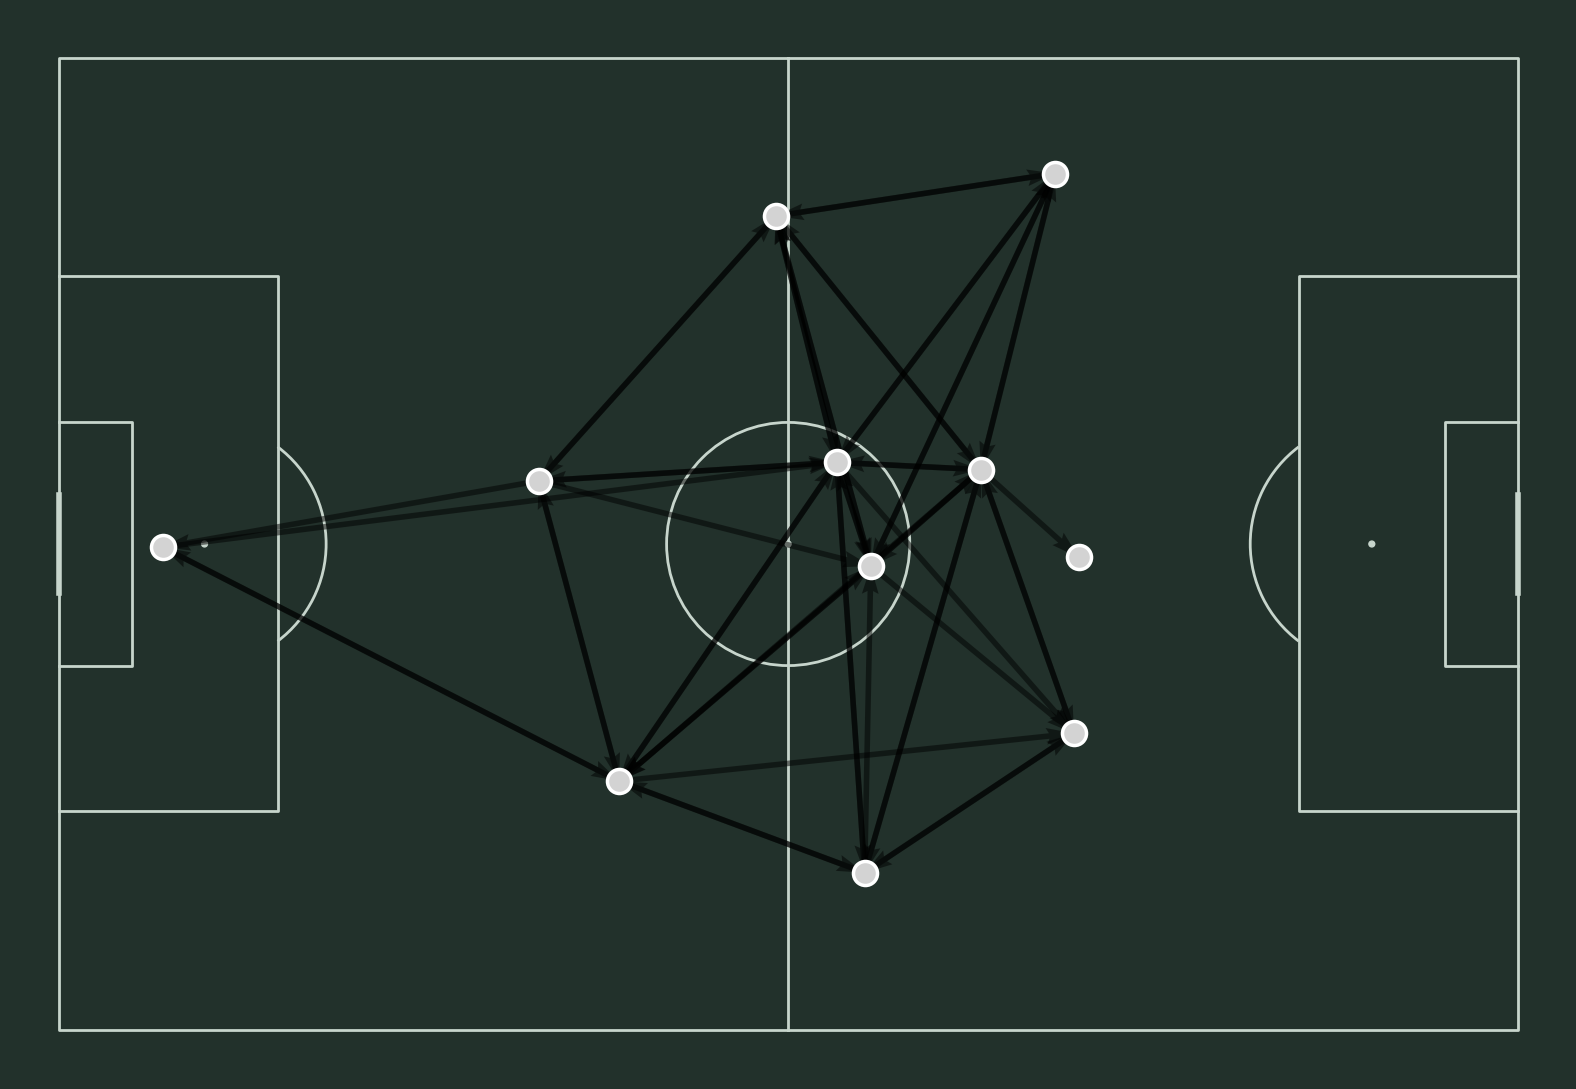

In [47]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen

# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

arrows = pitch.arrows(1.2*pass_between.x, 0.8*pass_between.y, 1.2*pass_between.x_end, 0.8*pass_between.y_end, ax=ax,
                      width=4, headwidth=3, alpha=0.5, zorder=1)

nodes = pitch.scatter(1.2*average_locations.x, 0.8*average_locations.y,
                      s = 300, color='#d3d3d3', edgecolors='white', linewidth=2.5, alpha=1,
                      zorder=1, ax=ax)